In [26]:
import numpy as np
from pylab import plt, mpl

plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline



In [28]:
def f(x):
    return np.sin(x) + .5*x

In [30]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

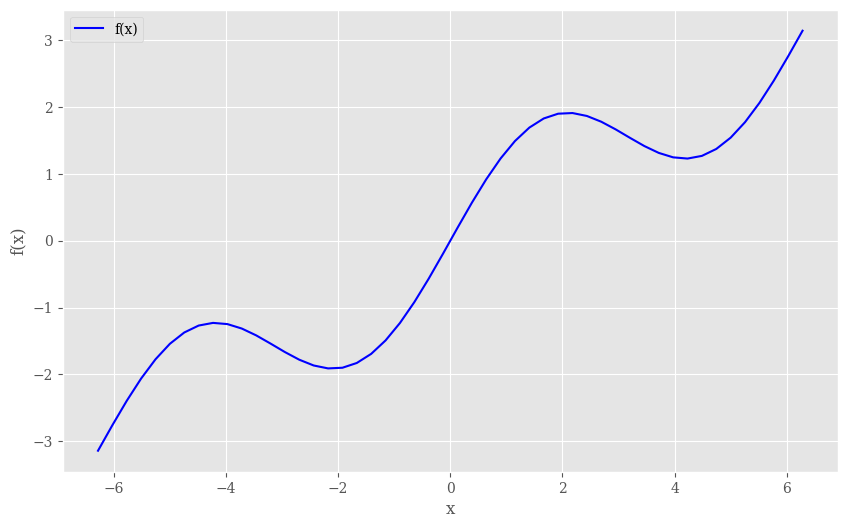

In [32]:
x = np.linspace(-2 * np.pi, 2*np.pi, 50)
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])
plt.show()

In [36]:
res = np.polyfit(x, f(x), deg=1, full=1)
res

(array([ 4.28841952e-01, -4.31775426e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

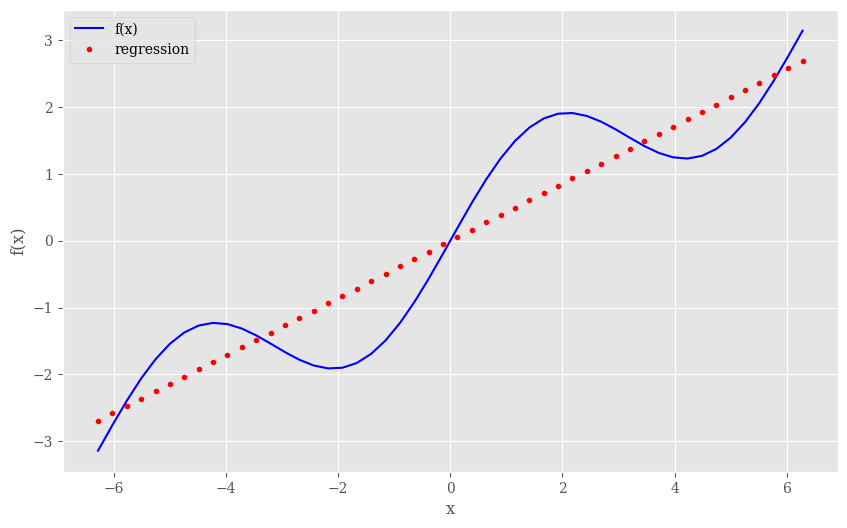

In [42]:
ry = np.polyval(res[0], x)
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
plt.show()

In [76]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

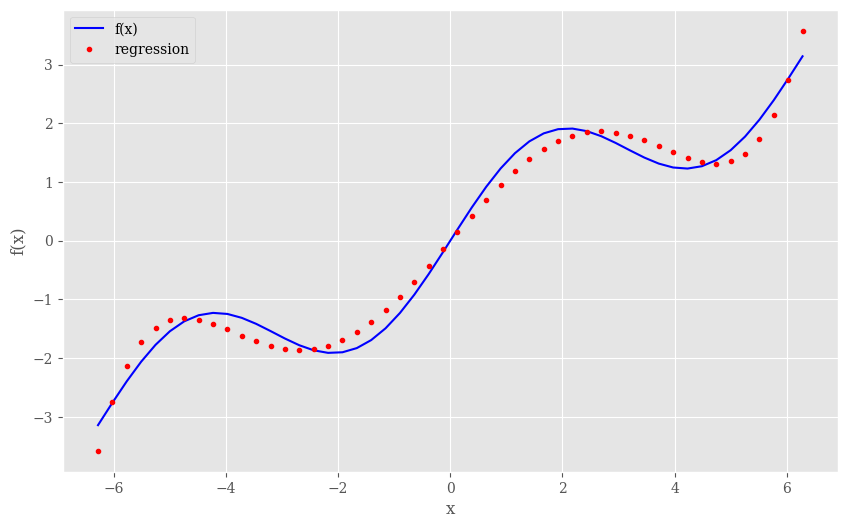

In [78]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
plt.show()

In [86]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

np.allclose(f(x), ry)

False

In [88]:
np.mean((f(x) - ry) ** 2)

0.001776913475951771

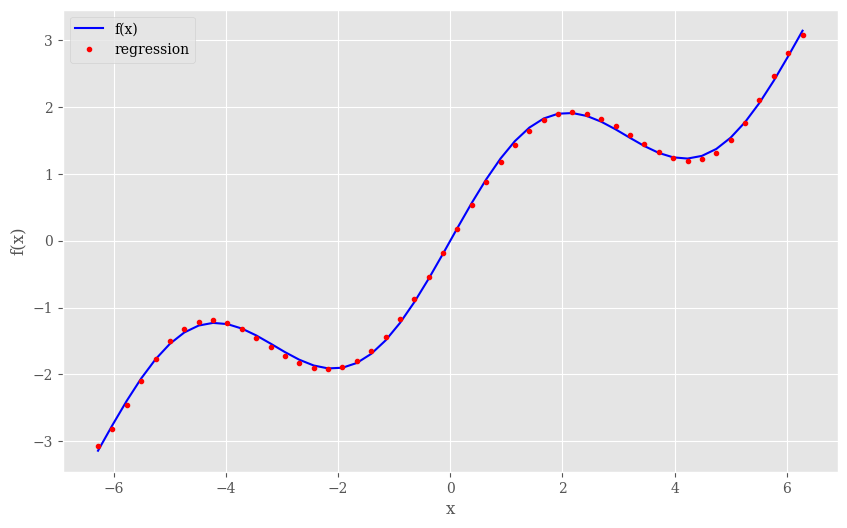

In [90]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
plt.show()

In [92]:
matrix = np.zeros((3+1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
reg.round(4)


array([ 0.    ,  0.5628, -0.    , -0.0054])

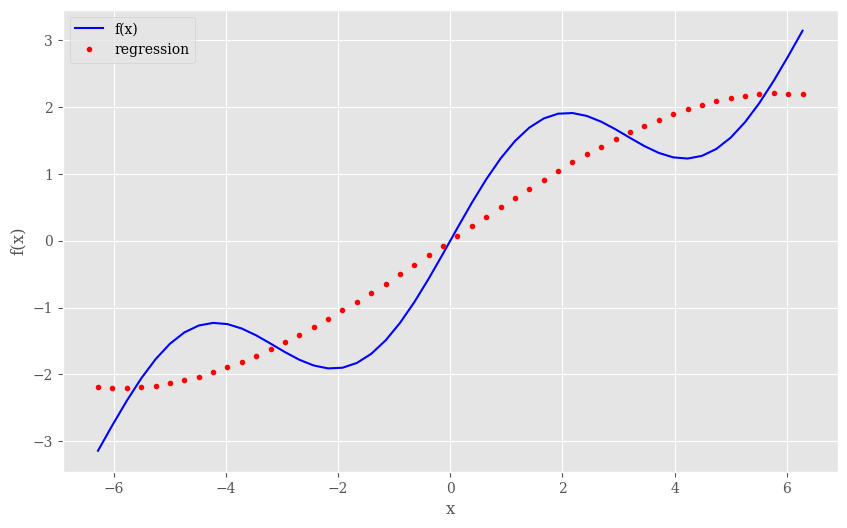

In [94]:
ry = np.dot(reg, matrix)
create_plot([x, x], [f(x), ry], ['b', 'r.'],
['f(x)', 'regression'], ['x', 'f(x)'])

plt.show()

In [96]:
matrix[3, :] = np.sin(x)

In [98]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [100]:
reg.round(4)

array([0. , 0.5, 0. , 1. ])

In [102]:
ry = np.dot(reg, matrix)

In [104]:
np.allclose(f(x), ry)

True

In [110]:
np.mean((f(x) - ry) **2)

2.099263639382087e-31

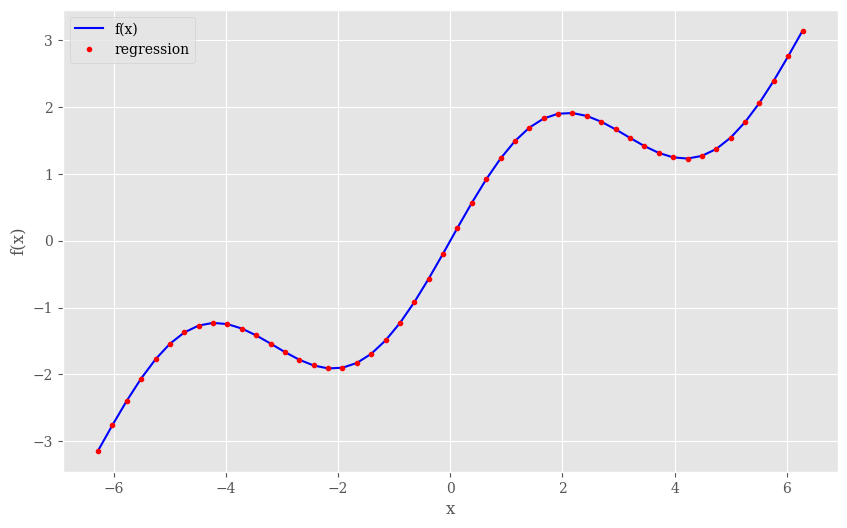

In [112]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
['f(x)', 'regression'], ['x', 'f(x)'])

plt.show()

In [115]:
xn = np.linspace(-2 *np.pi, 2 * np.pi, 50)
xn = xn + .15 * np.random.standard_normal(len(xn))
yn = f(xn) + .25 * np.random.standard_normal(len(xn))

In [265]:
reg  = np.polyfit(xn, yn, 5)
ry = np.polyval(reg, xn)

In [271]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
['f(x)', 'regression'], ['x', 'f(x)'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [273]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [275]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 4.83  0.01 -1.13 -4.24  2.63  1.31  3.08 -5.76 -0.41  0.74]
[ 1.42  0.02 -1.47 -1.23  1.8   1.62  1.6  -2.38 -0.61  1.05]


In [277]:
reg = np.polyfit(xu, yu, 7)
ry = np.polyval(reg, xu)

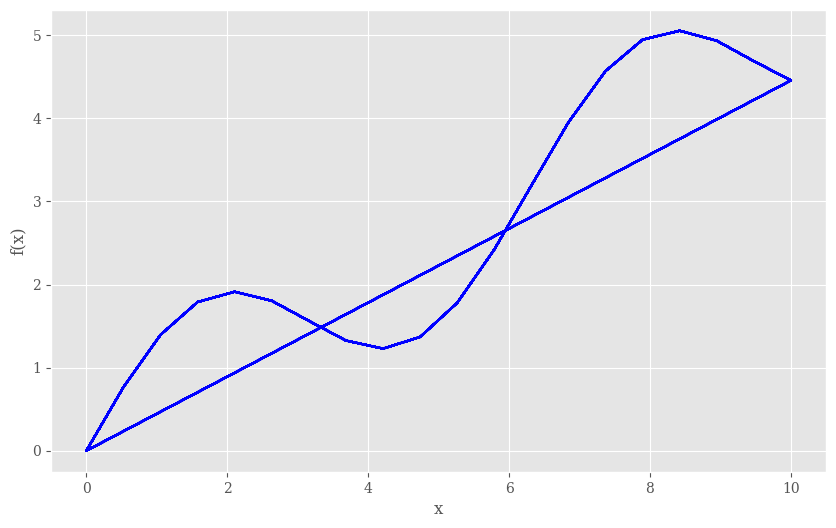

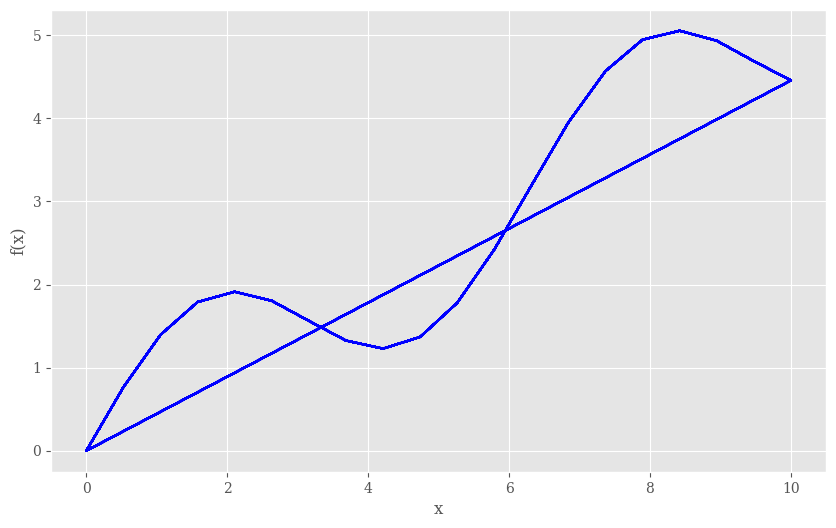

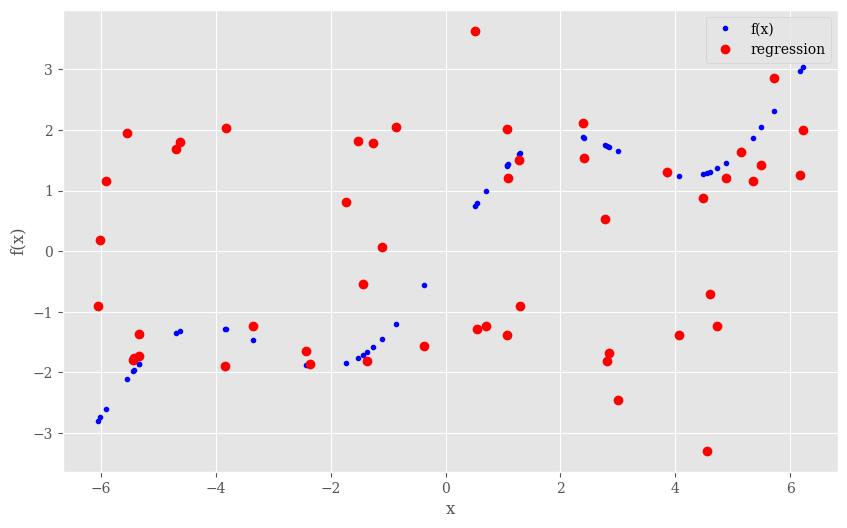

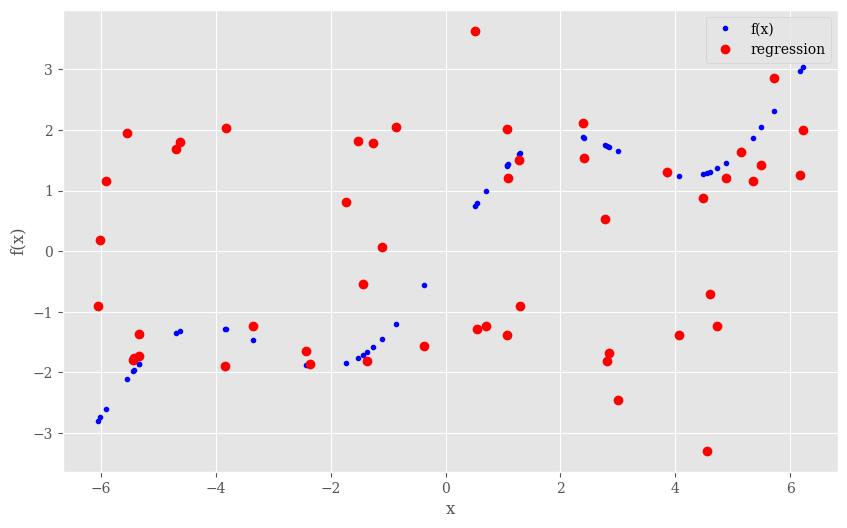

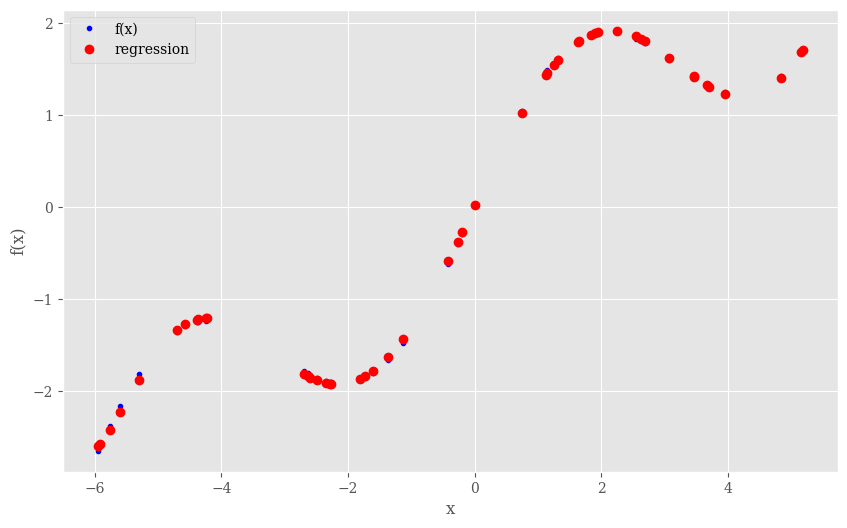

In [279]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
plt.show()

In [281]:
def fm(p):
    x, y = p
    return np.sin(x) + .25 * x + np.sqrt(y) + .05* y ** 2

In [283]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()



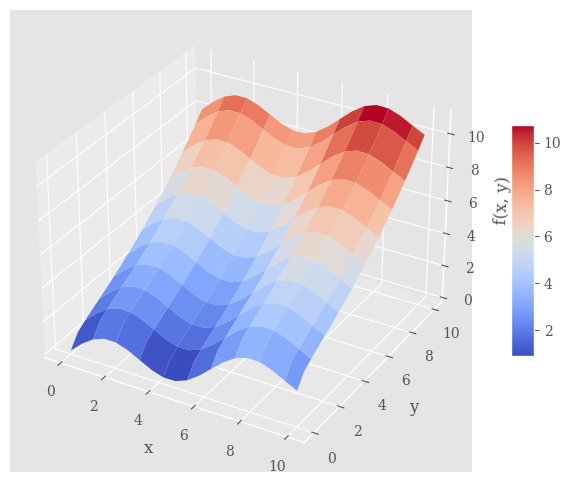

In [285]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
cmap='coolwarm', linewidth=0.5,
antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=.5, aspect=10)

plt.show()

In [287]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [289]:
eg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [295]:
import scipy.interpolate as spi



In [297]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)
def f(x):
    return np.sin(x) + .5 * x

In [299]:
ipo = spi.splrep(x, f(x), k =1 )

In [301]:
iy = spi.splev(x, ipo)

In [303]:
np.allclose(f(x), iy)

True

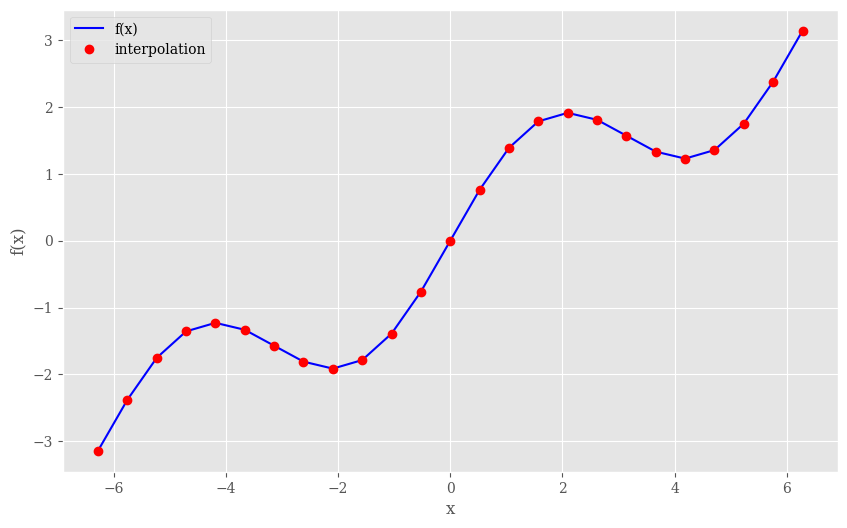

In [305]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
plt.show()
                                 

In [323]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

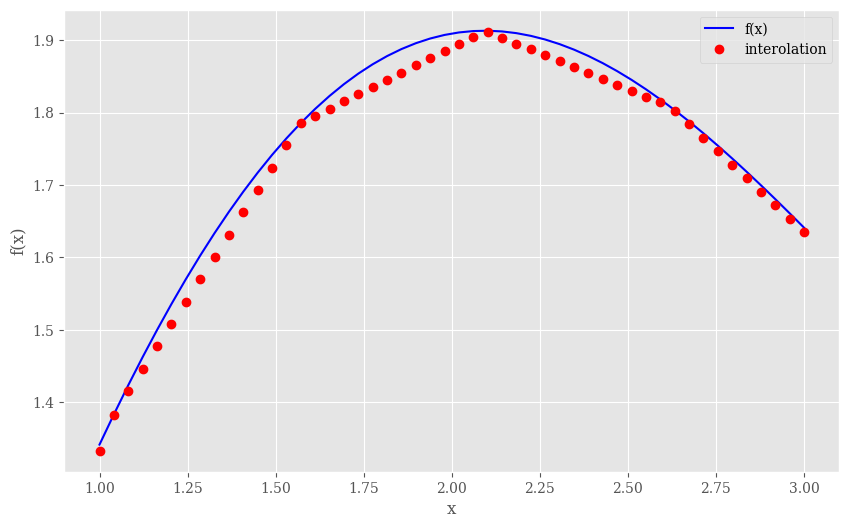

In [325]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interolation'], ['x', 'f(x)'])
plt.show()

In [337]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

In [339]:
np.allclose(f(xd), iyd)

False

In [341]:
np.mean((f(xd) - iyd) ** 2)

1.1349319851457788e-08

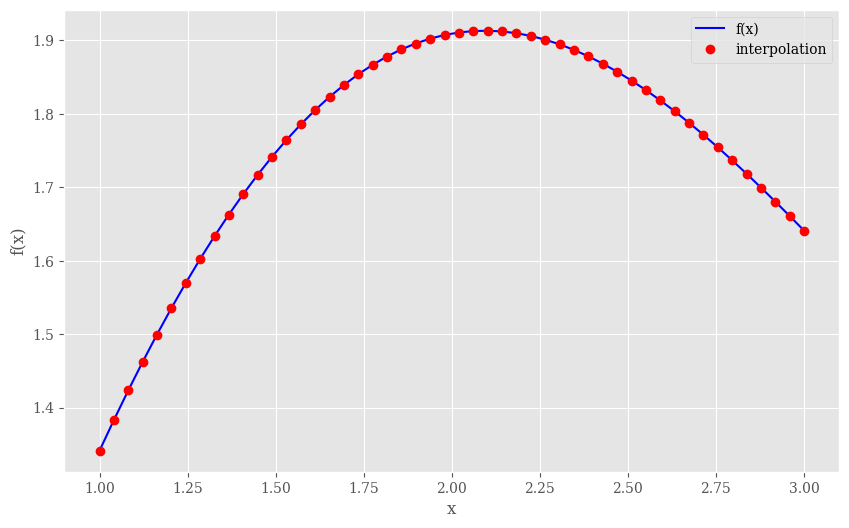

In [347]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
plt.show()

In [353]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
            + np.sin(y) + 0.05 * y ** 2)

In [357]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

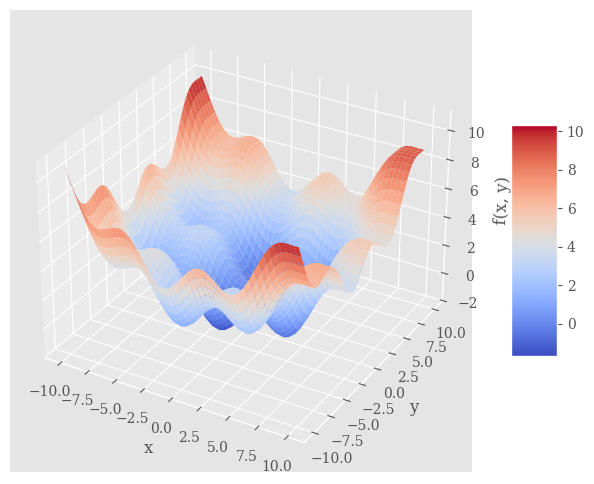

In [377]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='coolwarm', linewidth=0.5,
antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [383]:
import scipy.optimize as sco

In [385]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))
    return z

In [389]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [391]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [393]:
opt1

array([-1.4, -1.4])

In [395]:
fm(opt1)

-1.7748994599769203

In [397]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
                maxiter=15, maxfun=20)

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


/var/folders/26/7rbmh7x514j1yp7yhdgfbl7h0000gn/T/ipykernel_66485/3595886849.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,


In [399]:
opt2

array([-1.42702972, -1.42876755])

In [401]:
fm(opt2)

-1.7757246992239009

In [409]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

In [411]:
import math
def Eu(p):
    s, b = p
    return -(.5 * math.sqrt(s * 15+ b * 5) +
            .5 * math.sqrt(s * 5 + b * 12))

In [415]:
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})

In [417]:
bnds = ((0, 1000), (0, 1000))

In [429]:
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [431]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

In [433]:
result['x']

array([8.02547122, 1.97452878])

In [435]:
-result['fun']

9.700883611487832

In [437]:
np.dot(result['x'], [10, 10])

100.0

In [443]:
import scipy.integrate as sci

In [445]:
def f(x):
    return np.sin(x) + .5 * x

In [447]:
x = np.linspace(0, 10)
y = f(x)
a = .50
b = 9.5
Ix = np.linspace(a,b)
Iy = f(Ix)

In [449]:
from matplotlib.patches import Polygon

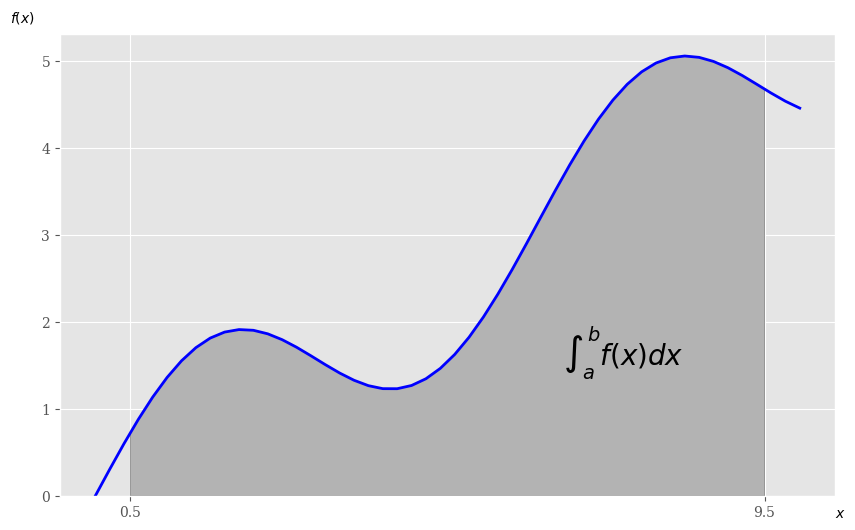

In [455]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))

plt.show()

In [457]:
sci.fixed_quad(f, a, b)[0]

24.366995967084605

In [459]:
sci.quad(f, a, b)[0]

24.374754718086752

In [461]:
sci.romberg(f, a, b)

/var/folders/26/7rbmh7x514j1yp7yhdgfbl7h0000gn/T/ipykernel_66485/1094288420.py:1: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  sci.romberg(f, a, b)


24.374754718086713

In [467]:
xi = np.linspace(0.5, 9.5, 25)

In [469]:
sci.trapz(f(xi), xi)

/var/folders/26/7rbmh7x514j1yp7yhdgfbl7h0000gn/T/ipykernel_66485/3872947094.py:1: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  sci.trapz(f(xi), xi)


24.352733271544516

In [471]:
sci.simps(f(xi), xi)

/var/folders/26/7rbmh7x514j1yp7yhdgfbl7h0000gn/T/ipykernel_66485/30335699.py:1: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  sci.simps(f(xi), xi)


24.37496418455075

In [473]:
import sympy as sy


In [475]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [505]:
pi_str = str(sy.N(sy.pi, 400000))


In [507]:
%time pi_str.find('121599')

CPU times: user 988 μs, sys: 2 μs, total: 990 μs
Wall time: 996 μs


-1

In [503]:
pi_str[-40:]

'8245672736856312185020980470362464176199'